In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [19]:
#loading dataset
df=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")

In [20]:
#looking at the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#looking at the coulums
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [22]:
#checking dtypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

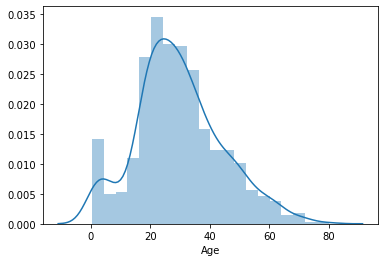

In [32]:
sb.distplot(df["Age"])

In [33]:
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived
x=df[["Pclass","Sex", "Age", "SibSp","Parch","Fare"]]
y=df["Survived"]
x["Age"]=df["Age"].fillna(df["Age"].mean())

<ipython-input-33-8b32dc47702d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Age"]=df["Age"].fillna(df["Age"].mean())


In [34]:
x["Sex"]=x["Sex"].map({"male":0,"female":1})

<ipython-input-34-af6d7cf688cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Sex"]=x["Sex"].map({"male":0,"female":1})


In [35]:
x["Sex"].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [37]:
dt_model=DecisionTreeClassifier()

In [38]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_hat=dt_model.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [43]:
accuracy_score(y_hat,y_test)

0.7457627118644068

In [75]:
dt_model.score(X_test,y_test)

0.7457627118644068

In [62]:
#now we will try to check after tuning the hyper parameetr
params={
    "criterion":['gini',"entropy"],
    "splitter" :['best',"random"],
    "max_depth":range(2,10,1),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(2,10),
    "max_leaf_nodes":range(2,15)
}
              


In [65]:
GD=GridSearchCV(estimator=dt_model,param_grid=params,cv=5,n_jobs=-1)

In [66]:
GD.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_leaf_nodes': range(2, 15),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [67]:
GD.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'best'}

In [70]:
NEW_DT=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 6,
 max_leaf_nodes= 9,
 min_samples_leaf= 9,
 min_samples_split= 2,
 splitter= 'best')

In [71]:
NEW_DT.fit(X_train,y_train
          )

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=9, min_samples_leaf=9)

In [72]:
newYhat=NEW_DT.predict(X_test)

In [73]:
accuracy_score(y_test,newYhat)

0.7898305084745763

In [74]:
NEW_DT.score(X_test,y_test)

0.7898305084745763

In [ ]:
#after tuning the parameter , we can see that, accuracy is incresed